# Part II - (Loan Data from Prosper)
## by (Gladys Mwangi)



## Investigation Overview


> The goal of this project is to find the factors that affect the loan outcome status and factors that affect the borrowers APR  or interest rate, also to find the differences between loans depending on how large the original amount was. 

## Dataset Overview

> In this project I selected a dataset from Prosper.com This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. With so many variable it was hard to  get started without any financial knowledge. Thanks to Propers.com who  provided detailed description for each variable. So the first step before  conducting any data analysis is to understand the meaning of each variable.  After reading through the descriptions and definitions,  I chose ‘BorrowerRate’ as my target variable since this number matters  a lot to a potential borrower


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud , STOPWORDS
import seaborn as sb
import re
%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')
# Subset the dataframe by selecting features of interest
cols = ['LoanOriginalAmount', 'BorrowerAPR', 'BorrowerRate', 'IncomeRange','StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus','Occupation']
df_loan= loan[cols]

## Univirate Exploration

### Occupation
we view the majority of job occupation borrowers listed 



Occupation word cloud 


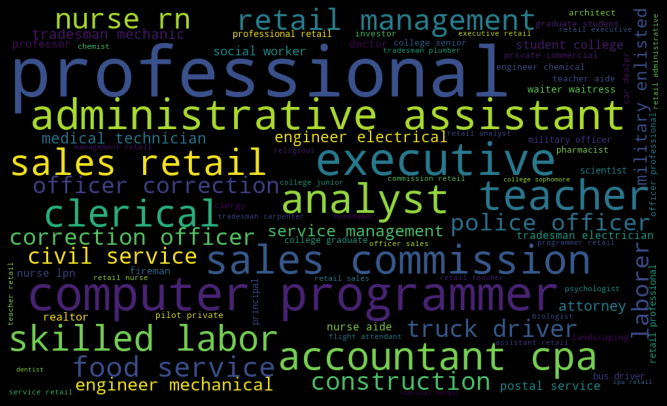

In [3]:
   #set up stop words  it will skip all null values
    
comment_words = '' 
stopwords = set(STOPWORDS)
stopwords = ['nan', 'NaN', 'Nan', 'NAN'] + list(STOPWORDS)
    
  #iterate through the df         
values = df_loan['Occupation'].values

for val in values: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += ' '.join(tokens)+' '

#generate word cloud
facecolor = 'black'

wordcloud = WordCloud(width=1000, height=600, 
            background_color=facecolor, 
            stopwords=stopwords,
            min_font_size=10).generate(comment_words)

#plot the word cloud
            
plt.figure(figsize=(10,6), facecolor=facecolor) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad=2)
print ('Occupation word cloud ')

##  Bivariate Exploration
### how does Loan Original Amount variation with Prosper Rating

> In the boxenplot plot we can observe from the graph that the groups of higher risk (HR) took lower loan amount and the groups C, B and A looks like have the same median loan amounts. The lowest risk group AA shows highest median loan amount.
The result is as expected as people with lower risk have the tendency to take more amount and vice versa.

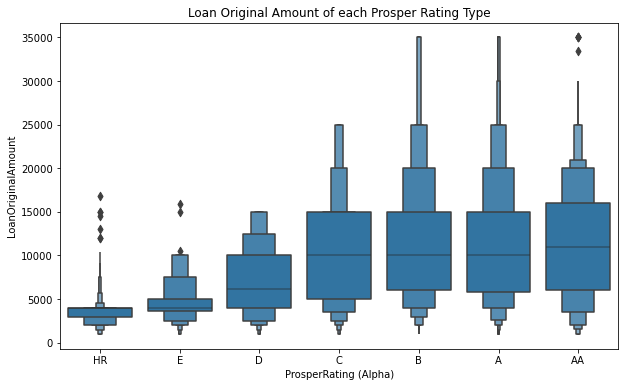

In [4]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(10,6))
sb.boxenplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', color = base_color,order =["HR", "E", "D", "C", "B","A", "AA"]);
plt.title("Loan Original Amount of each Prosper Rating Type");

## (Multivariate Exploration)
### ProsperRating (Alpha) vs Borrower Rate and Employment Status 

Observation:Employee stattus with prosper rating of HR hav a high Borrower Rate as compared to the rest while Employee status witj prosper rate of AA have the lowest Borrowers Rate. 


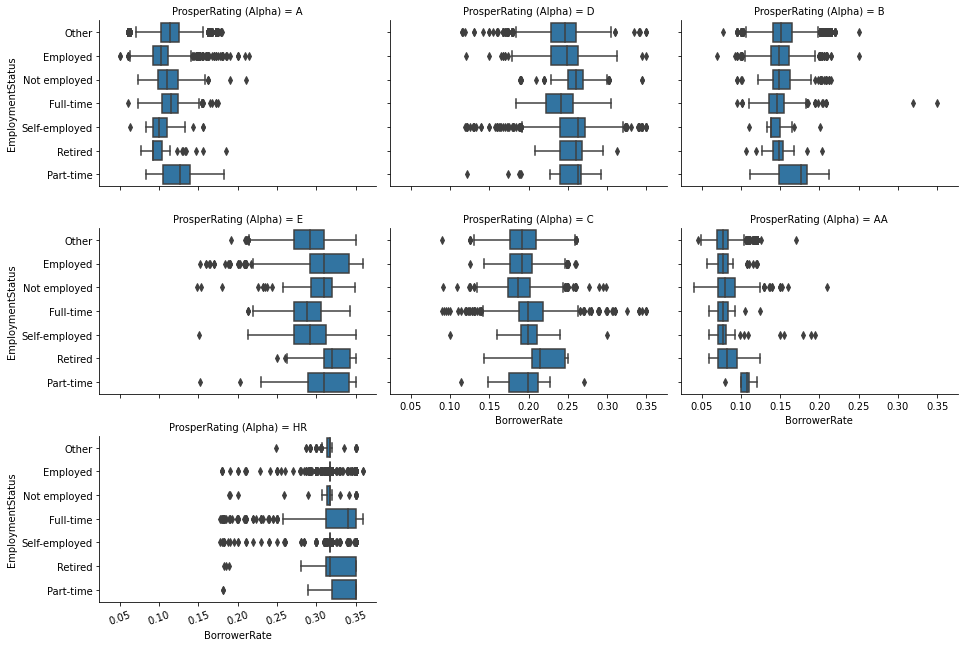

In [5]:
# plot matrix of numeric features against categorical features.

g = sb.FacetGrid(data = loan, col = "ProsperRating (Alpha)", col_wrap = 3, aspect = 1.5)
g.map(sb.boxplot, "BorrowerRate","EmploymentStatus")
plt.xticks(rotation = 20);

In [7]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 968853 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
^C

Interrupted
